In [1]:
import plotly_express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import os

In [2]:
PRICES_PATH = "../../data_processed/resale_flat_prices/engineered_data.csv"
original_df = pd.read_csv(PRICES_PATH)
pred_df = pd.read_csv("baggingregressor_pred_table.csv")

In [3]:
display(original_df.head(10))
display(pred_df.head(10))

,id,town,flat_type,flat_model,sale_date,floor,age,relative_tenure,floor_area,psm,...,nearest_post_offices,nearest_bus_stops,nearest_pharmacies,nearest_primary_schools,nearest_parks,nearest_trains,sale_month,cpi,cpi_psm,avg_sora
0,1,JURONG_WEST,3_ROOM,IMPROVED,1990-01-01,5.0,16,0.899953,70.0,334.285714,...,0.798752,0.195397,0.761661,0.541789,0.947906,0.904104,1,61.9,595.125779,NaN
1,2,OTHER,5_ROOM,STANDARD,1990-01-01,5.0,15,0.902280,120.0,916.666667,...,3.042559,0.090376,1.133326,0.159056,0.330270,1.954674,1,61.9,1631.933226,NaN
2,3,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,5.0,15,0.902280,63.0,722.222222,...,1.148847,0.446105,0.850333,0.943485,0.737703,0.932695,1,61.9,1285.765572,NaN
3,4,BUKIT_MERAH,OTHER,IMPROVED,1990-01-01,8.0,21,0.887322,29.0,251.724138,...,1.294327,1.620819,0.431442,0.691163,0.311404,0.448964,1,61.9,448.142165,NaN
4,5,BUKIT_MERAH,OTHER,IMPROVED,1990-01-01,11.0,21,0.887322,29.0,251.724138,...,1.294327,1.620819,0.431442,0.691163,0.311404,0.448964,1,61.9,448.142165,NaN
5,6,BUKIT_MERAH,OTHER,IMPROVED,1990-01-01,8.0,21,0.887322,29.0,310.344828,...,1.294327,1.620819,0.431442,0.691163,0.311404,0.448964,1,61.9,552.504039,NaN
6,7,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,8.0,7,0.918820,64.0,687.500000,...,1.018641,0.485058,0.986821,0.800866,0.808590,0.940111,1,61.9,1223.949919,NaN
7,8,BUKIT_MERAH,3_ROOM,MODEL_A,1990-01-01,8.0,6,0.920652,74.0,1128.378378,...,1.089870,0.544915,0.567711,0.490547,0.708861,0.799126,1,61.9,2008.841636,NaN
8,9,BUKIT_MERAH,3_ROOM,MODEL_A,1990-01-01,5.0,6,0.920652,73.0,1150.684932,...,1.657478,0.053197,0.982875,0.340834,1.013329,0.940071,1,61.9,2048.553788,NaN
9,10,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,2.0,15,0.902280,76.0,671.052632,...,0.690789,0.083148,0.637859,0.507003,0.406147,1.175060,1,61.9,1194.668821,NaN


,id,actual,pred,period
0,14795,701.492537,702.288834,1991Q2
1,14796,765.625000,639.003081,1991Q2
2,14797,1025.641026,990.826036,1991Q2
3,14798,755.319149,743.396787,1991Q2
4,14799,697.014925,664.942642,1991Q2
5,14800,677.966102,567.555054,1991Q2
6,14801,880.597015,733.457259,1991Q2
7,14802,712.328767,818.151133,1991Q2
8,14803,694.117647,648.891607,1991Q2
9,14804,377.049180,394.625744,1991Q2


In [4]:
df = pred_df.merge(original_df, how = "inner", on="id")
df["sale_month"] = df["sale_month"].astype(np.int64)
display(df.head(5))
display(df.columns)

,id,actual,pred,period,town,flat_type,flat_model,sale_date,floor,age,...,nearest_post_offices,nearest_bus_stops,nearest_pharmacies,nearest_primary_schools,nearest_parks,nearest_trains,sale_month,cpi,cpi_psm,avg_sora
0,14795,701.492537,702.288834,1991Q2,CLEMENTI,3_ROOM,NEW_GENERATION,1991-04-01,5.0,13,...,0.445320,0.149947,0.522394,0.409023,0.805405,0.481997,16,64.6,1196.663740,NaN
1,14796,765.625000,639.003081,1991Q2,BUKIT_BATOK,3_ROOM,SIMPLIFIED,1991-04-01,5.0,4,...,1.255801,0.052717,0.975715,0.571979,0.594545,1.187488,16,64.6,1306.066176,NaN
2,14797,1025.641026,990.826036,1991Q2,BEDOK,5_ROOM,STANDARD,1991-04-01,11.0,13,...,0.873955,0.154340,1.138649,0.270174,0.404171,0.899955,16,64.6,1749.622926,NaN
3,14798,755.319149,743.396787,1991Q2,JURONG_EAST,4_ROOM,NEW_GENERATION,1991-04-01,2.0,8,...,0.588043,0.128560,0.552882,0.459356,1.025006,0.663620,16,64.6,1288.485607,NaN
4,14799,697.014925,664.942642,1991Q2,JURONG_EAST,3_ROOM,NEW_GENERATION,1991-04-01,5.0,8,...,0.403156,0.136998,0.285124,0.581021,1.289216,0.515997,16,64.6,1189.025461,NaN


Index(['id', 'actual', 'pred', 'period', 'town', 'flat_type', 'flat_model',
       'sale_date', 'floor', 'age', 'relative_tenure', 'floor_area', 'psm',
       'address', 'latitude', 'longitude', 'latitude_rad', 'longitude_rad',
       'nearest_atm', 'nearest_libraries', 'nearest_hawkers', 'nearest_stores',
       'nearest_post_offices', 'nearest_bus_stops', 'nearest_pharmacies',
       'nearest_primary_schools', 'nearest_parks', 'nearest_trains',
       'sale_month', 'cpi', 'cpi_psm', 'avg_sora'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851033 entries, 0 to 851032
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       851033 non-null  int64  
 1   actual                   851033 non-null  float64
 2   pred                     851033 non-null  float64
 3   period                   851033 non-null  object 
 4   town                     851033 non-null  object 
 5   flat_type                851033 non-null  object 
 6   flat_model               851033 non-null  object 
 7   sale_date                851033 non-null  object 
 8   floor                    851033 non-null  float64
 9   age                      851033 non-null  int64  
 10  relative_tenure          851033 non-null  float64
 11  floor_area               851033 non-null  float64
 12  psm                      851033 non-null  float64
 13  address                  851033 non-null  object 
 14  lati

### Grouped by latitude and longitude

In [6]:
def produce_grouped_coords(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.assign(mean_abs_err = lambda x: np.abs(x["pred"] - x["actual"])*100/x["actual"],
              combined_coords = lambda x: x["longitude"].astype(str) + ", " + x["latitude"].astype(str))
  res_df = new_df.groupby(by="combined_coords").agg({"mean_abs_err": "mean", 
                                                "town": "first", "address": "first", "flat_type": "count"})
  res_df = res_df.rename(columns={"mean":"mean_abs_err", "count":"num_datapoints", "flat_type": "num_datapoints"})
  return res_df

In [7]:
res_df = produce_grouped_coords(df).reset_index()
res_df[["longitude", "latitude"]] = res_df["combined_coords"].str.split(", ", expand=True)
res_df[["longitude", "latitude"]] = res_df[["longitude", "latitude"]].astype(np.float32)
res_df = res_df.drop(columns="combined_coords")
display(res_df.head(10))

,mean_abs_err,town,address,num_datapoints,longitude,latitude
0,8.374184,JURONG_WEST,BLOCK 905 JURONG WEST ST 91,37,103.685165,1.340518
1,6.316634,JURONG_WEST,BLOCK 906 JURONG WEST ST 91,130,103.685524,1.341542
2,6.189006,JURONG_WEST,BLOCK 904 JURONG WEST ST 91,159,103.685982,1.340221
3,5.497301,JURONG_WEST,BLOCK 910 JURONG WEST ST 91,129,103.685982,1.341833
4,5.514089,JURONG_WEST,BLOCK 907 JURONG WEST ST 91,91,103.686005,1.341082
5,6.531286,JURONG_WEST,BLOCK 903 JURONG WEST ST 91,118,103.686066,1.339488
6,6.407203,JURONG_WEST,BLOCK 909 JURONG WEST ST 91,147,103.686249,1.341318
7,7.430800,JURONG_WEST,BLOCK 908 JURONG WEST ST 91,139,103.686432,1.340511
8,7.065674,JURONG_WEST,BLOCK 902 JURONG WEST ST 91,125,103.686569,1.339107
9,5.615442,JURONG_WEST,BLOCK 911 JURONG WEST ST 91,90,103.686882,1.341901


In [8]:
lat_lon_fig = px.scatter_mapbox(res_df, lat="latitude", lon="longitude", hover_name="address", color = "mean_abs_err",
                  size = "num_datapoints", hover_data=["town", "mean_abs_err"],
                  width = 1000, height = 800).update_layout(
  mapbox={
    "style": "carto-positron",
    "zoom": 10,
  }
)
lat_lon_fig.write_html("./baggingregressor-lat-lon-fig.html")

### Grouped by towns

In [9]:
def produce_grouped_towns(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.assign(mean_abs_err = lambda x: np.abs(x["pred"] - x["actual"])*100/x["actual"])
  res_df = new_df.groupby(by="town").agg({"mean_abs_err": "mean", "flat_type":"count", "longitude": "mean", "latitude": "mean"})
  res_df = res_df.rename(columns = {"flat_type": "num_datapoints", "longitude": "mean_longitude", "latitude": "mean_latitude"})
  return res_df

In [10]:
town_df = produce_grouped_towns(df).reset_index()
display(town_df.head(10))

,town,mean_abs_err,num_datapoints,mean_longitude,mean_latitude
0,ANG_MO_KIO,7.023214,48204,103.847218,1.370911
1,BEDOK,7.077596,60473,103.927436,1.329341
2,BISHAN,6.563292,20434,103.846193,1.352748
3,BUKIT_BATOK,6.433452,40724,103.750166,1.353090
4,BUKIT_MERAH,7.191540,31004,103.821713,1.281154
5,BUKIT_PANJANG,5.421814,26282,103.768529,1.381266
6,CHOA_CHU_KANG,5.249673,36078,103.746104,1.386600
7,CLEMENTI,7.174673,25620,103.765661,1.313058
8,GEYLANG,7.738128,25531,103.891438,1.322178
9,HOUGANG,5.981694,47586,103.888716,1.369496


In [11]:
town_fig = px.scatter_mapbox(town_df, lat="mean_latitude", lon="mean_longitude", hover_name="town", color = "mean_abs_err",
                  size = "num_datapoints", hover_data=["mean_abs_err"],
                  width = 1000, height = 800).update_layout(
  mapbox={
    "style": "carto-positron",
    "zoom": 10,
  }
)
town_fig.write_html("./baggingregressor-town-fig.html")

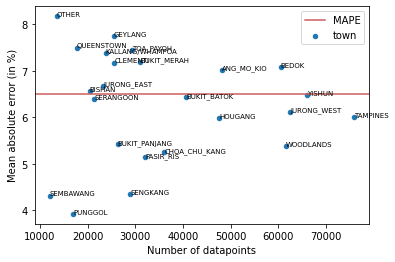

In [12]:
town_df.plot.scatter(x = "num_datapoints", y = "mean_abs_err", label="town")
plt.axhline(xmin = 0, xmax = 80000, y = 6.501, label="MAPE", color = "indianred")
plt.legend()
plt.xlabel("Number of datapoints")
plt.ylabel("Mean absolute error (in %)")
for k,v  in town_df.iterrows():
  plt.annotate(town_df.loc[k, "town"], (town_df.loc[k, "num_datapoints"], town_df.loc[k, "mean_abs_err"]), fontsize = 7)
plt.savefig("./baggingregressor-town-mape.png")
plt.show()

### Grouped by towns for each sale year

In [13]:
def produce_grouped_towns_timed(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.assign(mean_abs_err = lambda x: np.abs(x["pred"] - x["actual"])*100/x["actual"],
                        sale_year = lambda x: np.floor(x["sale_month"] / 12 + 1990).astype(np.int64))
  res_df = new_df.groupby(by=["sale_year", "town"]).agg({"mean_abs_err": "mean", "flat_type":"count", "longitude": "mean", "latitude": "mean"})
  res_df = res_df.rename(columns = {"flat_type": "num_datapoints", "longitude": "mean_longitude", "latitude": "mean_latitude"})
  return res_df

In [14]:
time_town_df = produce_grouped_towns_timed(df).reset_index()
display(time_town_df.head(10))

,sale_year,town,mean_abs_err,num_datapoints,mean_longitude,mean_latitude
0,1991,ANG_MO_KIO,10.492860,1171,103.846775,1.370967
1,1991,BEDOK,12.828518,807,103.928810,1.329202
2,1991,BISHAN,13.439852,189,103.844633,1.351682
3,1991,BUKIT_BATOK,10.760223,546,103.749381,1.353131
4,1991,BUKIT_MERAH,11.158011,442,103.821486,1.281079
5,1991,BUKIT_PANJANG,8.744664,9,103.770131,1.377474
6,1991,CHOA_CHU_KANG,9.812232,49,103.753673,1.380665
7,1991,CLEMENTI,10.725472,438,103.765604,1.313180
8,1991,GEYLANG,11.289593,462,103.892533,1.322795
9,1991,HOUGANG,11.195822,554,103.890067,1.365040


In [15]:
time_town_fig = px.scatter_mapbox(time_town_df, lat="mean_latitude", lon="mean_longitude", hover_name="town", color = "mean_abs_err",
                  size = "num_datapoints", hover_data=["mean_abs_err"],
                  width = 1000, height = 800,
                  animation_frame = "sale_year",
                  range_color = (0, 15), size_max = 30
                  ).update_layout(
  mapbox={
    "style": "carto-positron",
    "zoom": 10,
  }
)
time_town_fig.write_html("./baggingregressor-time-town-fig.html")

In [16]:
year_df = time_town_df.groupby("sale_year").agg(mean_abs_err = ("mean_abs_err", lambda x: np.average(x, weights=time_town_df.loc[x.index, "num_datapoints"])))
year_df = year_df.reset_index()
display(year_df.head(10))

,sale_year,mean_abs_err
0,1991,11.638542
1,1992,14.631289
2,1993,18.654959
3,1994,10.032145
4,1995,8.714445
5,1996,9.463607
6,1997,5.293424
7,1998,6.475362
8,1999,6.383120
9,2000,4.946256


In [17]:
import plotly.graph_objects as go
groups = time_town_df["town"].unique()

mape_time_town = go.Figure()
for group in groups:
  df_group = time_town_df[time_town_df["town"] == group]
  mape_time_town.add_trace(go.Scatter(x = df_group["sale_year"], y = df_group["mean_abs_err"],
                                name = group, line=dict(width = 1.5), mode="lines+markers", marker=dict(size=4)))
mape_time_town.add_trace(go.Scatter(x = year_df["sale_year"], y = year_df["mean_abs_err"], name = "Mean", 
                                    line=dict(width = 4, dash="dash"), mode="lines+markers", marker=dict(size=4)))
mape_time_town.update_layout(title="Prediction MAPE for Rolling BaggingRegressor in different towns across time", xaxis_title="Year of sale",
                        yaxis_title="Mean absolute percentage error (in %)")
mape_time_town.write_html("baggingregressor-mape-time-town.html")


### Boxplot of absolute percentage errors for each town

In [18]:
def produce_mape_boxplot_town(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.assign(abs_err = lambda x: np.abs(x["pred"] - x["actual"])*100/x["actual"],
                        sale_year = lambda x: np.floor(x["sale_month"] / 12 + 1990).astype(np.int64))
  res_df = new_df.rename(columns = {"flat_type": "num_datapoints", "longitude": "mean_longitude", "latitude": "mean_latitude"})
  res_df = res_df.drop(columns=res_df.columns.difference(["town", "abs_err", "sale_year"]))
  return res_df

In [19]:
boxplot_df = produce_mape_boxplot_town(df)
mape_boxplot_town = px.box(boxplot_df, x = "town", y = "abs_err", color = "town", animation_frame="sale_year", range_y=(0, 30))
mape_boxplot_town.write_html("./baggingregressor-mape-boxplot-town.html")

### Heatmap between `pred` and other columns

In [20]:
df.columns

Index(['id', 'actual', 'pred', 'period', 'town', 'flat_type', 'flat_model',
       'sale_date', 'floor', 'age', 'relative_tenure', 'floor_area', 'psm',
       'address', 'latitude', 'longitude', 'latitude_rad', 'longitude_rad',
       'nearest_atm', 'nearest_libraries', 'nearest_hawkers', 'nearest_stores',
       'nearest_post_offices', 'nearest_bus_stops', 'nearest_pharmacies',
       'nearest_primary_schools', 'nearest_parks', 'nearest_trains',
       'sale_month', 'cpi', 'cpi_psm', 'avg_sora'],
      dtype='object')

In [21]:
def produce_heatmap_df(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.drop(columns = ["id", "town", "period", "flat_type", "flat_model", "sale_date", "psm", "address", "latitude", "longitude",
                                  "latitude_rad", "longitude_rad"])
  return new_df

In [22]:
heatmap_df = produce_heatmap_df(df)
heatmap = px.imshow(heatmap_df.corr())
heatmap.write_html("./baggingregressor-heatmap.html")

### Grouped by towns, median

In [23]:
def produce_grouped_towns_median(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.assign(med_abs_err = lambda x: np.abs(x["pred"] - x["actual"])*100/x["actual"])
  res_df = new_df.groupby(by="town").agg({"med_abs_err": "median", "flat_type":"count", "longitude": "mean", "latitude": "mean"})
  res_df = res_df.rename(columns = {"flat_type": "num_datapoints", "longitude": "mean_longitude", "latitude": "mean_latitude"}).reset_index()
  return res_df

In [24]:
town_df_med = produce_grouped_towns_median(df)
display(town_df_med.head(5))

,town,med_abs_err,num_datapoints,mean_longitude,mean_latitude
0,ANG_MO_KIO,5.160011,48204,103.847218,1.370911
1,BEDOK,5.139288,60473,103.927436,1.329341
2,BISHAN,4.962002,20434,103.846193,1.352748
3,BUKIT_BATOK,4.855599,40724,103.750166,1.353090
4,BUKIT_MERAH,5.217815,31004,103.821713,1.281154


In [25]:
town_fig_med = px.scatter_mapbox(town_df_med, lat="mean_latitude", lon="mean_longitude", hover_name="town", color = "med_abs_err",
                  size = "num_datapoints", hover_data=["med_abs_err"],
                  width = 1000, height = 800).update_layout(
  mapbox={
    "style": "carto-positron",
    "zoom": 10,
  }
)
town_fig_med.write_html("./baggingregressor-town-fig-med.html")

### Grouped by towns for each sale year, median

In [26]:
def produce_grouped_towns_timed_median(df):
  new_df = deepcopy(df)
  new_df = new_df[(103 <= new_df["longitude"]) & (new_df["longitude"] <= 104.5) &
                  (1 <= new_df["latitude"]) & (new_df["latitude"] < 2)]
  new_df = new_df.assign(med_abs_err = lambda x: np.abs(x["pred"] - x["actual"])*100/x["actual"],
                        sale_year = lambda x: np.floor(x["sale_month"] / 12 + 1990).astype(np.int64))
  res_df = new_df.groupby(by=["sale_year", "town"]).agg({"med_abs_err": "median", "flat_type":"count", "longitude": "mean", "latitude": "mean"})
  res_df = res_df.rename(columns = {"flat_type": "num_datapoints", "longitude": "mean_longitude", "latitude": "mean_latitude"}).reset_index()
  return res_df

In [27]:
time_town_df_med = produce_grouped_towns_timed_median(df)
display(time_town_df_med.head(10))

,sale_year,town,med_abs_err,num_datapoints,mean_longitude,mean_latitude
0,1991,ANG_MO_KIO,7.547899,1171,103.846775,1.370967
1,1991,BEDOK,10.502323,807,103.928810,1.329202
2,1991,BISHAN,11.469697,189,103.844633,1.351682
3,1991,BUKIT_BATOK,8.822695,546,103.749381,1.353131
4,1991,BUKIT_MERAH,9.142517,442,103.821486,1.281079
5,1991,BUKIT_PANJANG,9.247658,9,103.770131,1.377474
6,1991,CHOA_CHU_KANG,7.070854,49,103.753673,1.380665
7,1991,CLEMENTI,6.840335,438,103.765604,1.313180
8,1991,GEYLANG,8.657344,462,103.892533,1.322795
9,1991,HOUGANG,8.691566,554,103.890067,1.365040


In [28]:
year_df_med = time_town_df_med.groupby("sale_year").agg(med_abs_err = ("med_abs_err", lambda x: np.average(x, weights=time_town_df_med.loc[x.index, "num_datapoints"])))
year_df_med = year_df_med.reset_index()
display(year_df_med.head(10))

,sale_year,med_abs_err
0,1991,9.242063
1,1992,11.955146
2,1993,17.421420
3,1994,8.201370
4,1995,7.758978
5,1996,8.516184
6,1997,4.176256
7,1998,5.098014
8,1999,4.899154
9,2000,3.979144


In [29]:
groups_med = time_town_df_med["town"].unique()

mdape_time_town = go.Figure()
for group in groups_med:
  df_group = time_town_df_med[time_town_df_med["town"] == group]
  mdape_time_town.add_trace(go.Scatter(x = df_group["sale_year"], y = df_group["med_abs_err"],
                                name = group, line=dict(width = 1.5), mode="lines+markers", marker=dict(size=4)))
mdape_time_town.add_trace(go.Scatter(x = year_df_med["sale_year"], y = year_df_med["med_abs_err"], name = "Average MdAPE", 
                                    line=dict(width = 4, dash="dash"), mode="lines+markers", marker=dict(size=4)))
mdape_time_town.update_layout(title="Prediction MdAPE for Rolling BaggingRegressor in different towns across time", xaxis_title="Year of sale",
                        yaxis_title="Median absolute percentage error (in %)")
mdape_time_town.write_html("baggingregressor-mdape-time-town.html")
